In [1]:
import os
import pandas as pd
import numpy as np
# TODO
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

2.2.0


In [2]:
def load_and_preprocess_data(data_path, t_data_path, predict_path, t_predict_path, t_values = 0):
    def common_preprocess(data, t_data, epoch):
        
        for i in range(1,t_values+1):
            data['value_t-'+str(i)] = data['Daily hospital occupancy'] - t_data['value_t-'+str(i)]
        
        data = data.rename(columns={'Daily hospital occupancy': 'daily_hospital_occupancy'})
    
        data['date'] = pd.to_datetime(data['date'])
        print(epoch)
        data['date_encoding'] = (data['date']-epoch).dt.days
        data = data.drop(['date'], axis=1)
        data = data.drop(['year_week'], axis=1)
        
        return data
    
    data = pd.read_csv(data_path)
    t_data = pd.read_csv(t_data_path)
    epoch = pd.to_datetime(data['date']).min()
    
    df = common_preprocess(data, t_data, epoch)
    predict_data = pd.read_csv(predict_path)
    index = predict_data['country'] + ' ' + predict_data['date']
    t_predict_data = pd.read_csv(t_predict_path)
    predict_df = common_preprocess(predict_data, t_predict_data, epoch)
    
    return index, df, predict_df

In [3]:
t_values = 14
index, df, pdf = load_and_preprocess_data('train_creative.csv', 'train_creative_t_values.csv', 'test_creative_no_label.csv', 'test_creative_t_values.csv', t_values)

CATEGORICAL_COLUMNS = df.columns[0:1].to_numpy().astype('object').tolist()
NUMERIC_COLUMNS = df.columns[1:].to_numpy().tolist()
NUMERIC_COLUMNS.remove('next_week_hospitalizations')

2020-02-12 00:00:00
2020-02-12 00:00:00


In [4]:
scaler = StandardScaler()
df[NUMERIC_COLUMNS] = scaler.fit_transform(df[NUMERIC_COLUMNS])
pdf[NUMERIC_COLUMNS] = scaler.transform(pdf[NUMERIC_COLUMNS])

In [5]:
data = df[CATEGORICAL_COLUMNS + NUMERIC_COLUMNS]
pdata = pdf[CATEGORICAL_COLUMNS + NUMERIC_COLUMNS]

In [6]:
y = df['next_week_hospitalizations']

In [7]:
data

country  daily_hospital_occupancy  under_15_cases  15-24_cases  \
0     Belgium                 -0.351214       -0.369019    -0.427223   
1     Belgium                 -0.332702       -0.367305    -0.419764   
2     Belgium                 -0.311422       -0.367305    -0.419764   
3     Belgium                 -0.284951       -0.367305    -0.419764   
4     Belgium                 -0.251387       -0.367305    -0.419764   
...       ...                       ...             ...          ...   
3980    Spain                  2.425800        1.800035     0.944441   
3981    Spain                  2.234448        1.256557     0.685622   
3982    Spain                  1.938079        1.256557     0.685622   
3983    Spain                  1.823199        1.256557     0.685622   
3984    Spain                  1.715240        1.256557     0.685622   

      25-49_cases  50-64_cases  65-79_cases  over_80_cases  value_t-1  \
0       -0.424536    -0.401582    -0.403804      -0.409997   1.046794   
1       -0.392884    -0.375323    -0.364444      -0.346989   0.392164   
2       -0.392884    -0.375323    -0.364444      -0.346989   0.459305   
3       -0.392884    -0.375323    -0.364444      -0.346989   0.585196   
4       -0.392884    -0.375323    -0.364444      -0.346989   0.757246   
...           ...          ...          ...            ...        ...   
3980     0.862060     0.654951     0.626430       0.484399  -4.022398   
3981     0.599388     0.444623     0.409565       0.228008  -4.698011   
3982     0.599388     0.444623     0.409565       0.228008  -7.245196   
3983     0.599388     0.444623     0.409565       0.228008  -2.843223   
3984     0.599388     0.444623     0.409565       0.228008  -2.675369   

      value_t-2  ...  value_t-6  value_t-7  value_t-8  value_t-9  value_t-10  \
0      0.549160  ...   0.151643   0.119627   0.095151   0.075769    0.059728   
1      0.798129  ...   0.244023   0.199874   0.166195   0.139702    0.118010   
2      0.472375  ...   0.350218   0.292121   0.247862   0.213196    0.185007   
3      0.579408  ...   0.482314   0.406866   0.349447   0.304615    0.268346   
4      0.744613  ...   0.649808   0.552360   0.478255   0.420532    0.374016   
...         ...  ...        ...        ...        ...        ...         ...   
3980  -4.735047  ...  -6.279613  -6.457610  -6.577620  -6.907935   -6.768019   
3981  -4.835100  ...  -6.207953  -6.296367  -6.462091  -6.590060   -6.909095   
3982  -6.622098  ...  -6.580930  -6.689351  -6.722363  -6.848782   -6.949947   
3983  -5.593643  ...  -5.915270  -6.226620  -6.373785  -6.456217   -6.614415   
3984  -3.059737  ...  -5.354942  -5.618394  -5.937565  -6.118624   -6.234763   

      value_t-11  value_t-12  value_t-13  value_t-14  date_encoding  
0       0.046366    0.034817    0.025204    0.016611      -1.536252  
1       0.100031    0.084702    0.071993    0.060765      -1.527243  
2       0.161720    0.142047    0.125779    0.111522      -1.518234  
3       0.238455    0.213378    0.192684    0.174658      -1.509225  
4       0.335753    0.303825    0.277517    0.254712      -1.500216  
...          ...         ...         ...         ...            ...  
3980   -6.586459   -6.587811   -6.563344   -6.574289       1.535888  
3981   -6.795098   -6.646554   -6.670041   -6.657233       1.562916  
3982   -7.229429   -7.123496   -6.990570   -7.008401       1.580934  
3983   -6.740932   -7.038178   -6.979200   -6.878002       1.589944  
3984   -6.411924   -6.565432   -6.881686   -6.850767       1.598953  

[3985 rows x 23 columns]

In [8]:
seed = 42

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_val, y_train, y_val = train_test_split(data, y, test_size = 1 - train_ratio, random_state = seed)

#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = seed)

In [9]:
# Make sure you comment your code clearly and you may refer to these comments in the part 2.4
# TODO
def create_tf_df(df, labels, shuffle = True, batch_size = 32):
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size = len(df))
    ds = ds.batch(batch_size)
    return ds

def create_pdf(df, batch_size = 1):
    ds = tf.data.Dataset.from_tensor_slices(dict(pdf))
    ds = ds.batch(batch_size)
    return ds
    
batch_size = 40

train_df = create_tf_df(x_train, y_train, shuffle = False, batch_size = batch_size)
val_df = create_tf_df(x_val, y_val, shuffle = False, batch_size = batch_size)
#test_df = create_tf_df(x_test, y_test, shuffle = False, batch_size = batch_size)
full_df = create_tf_df(data, y, shuffle = False, batch_size = batch_size)
pdf_df = create_pdf(pdf)

In [10]:
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = data[feature_name].unique()
    feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float64))

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [18]:
initial_lr = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps = 100000,
    decay_rate = 0.96,
    staircase = True)

from tensorflow.keras import optimizers

    
model = tf.keras.Sequential([
    feature_layer,
    tf.keras.layers.Dense(20, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.2, l2=0.01)),
    tf.keras.layers.Dense(20, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.2, l2=0.01)),
    tf.keras.layers.Dense(20, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.2, l2=0.01)),
    tf.keras.layers.Dense(1)
])
    
optimizer = tf.optimizers.RMSprop(learning_rate = lr_schedule)

model.compile(loss = 'mse',
              optimizer = optimizer,
              metrics=['mse'])

In [19]:
history = model.fit(full_df, validation_data = val_df, epochs = 1000)

Epoch 1/1000
100/100 [==============================] - 1s 8ms/step - loss: 40684288.0000 - mse: 40684236.0000 - val_loss: 38943612.0000 - val_mse: 38943564.0000
Epoch 2/1000
100/100 [==============================] - 1s 5ms/step - loss: 40661112.0000 - mse: 40661056.0000 - val_loss: 38915220.0000 - val_mse: 38915164.0000
Epoch 3/1000
100/100 [==============================] - 1s 5ms/step - loss: 40625432.0000 - mse: 40625388.0000 - val_loss: 38871224.0000 - val_mse: 38871176.0000
Epoch 4/1000
100/100 [==============================] - 1s 6ms/step - loss: 40569996.0000 - mse: 40569948.0000 - val_loss: 38803280.0000 - val_mse: 38803236.0000
Epoch 5/1000
100/100 [==============================] - 1s 6ms/step - loss: 40483556.0000 - mse: 40483508.0000 - val_loss: 38698668.0000 - val_mse: 38698616.0000
Epoch 6/1000
100/100 [==============================] - 1s 6ms/step - loss: 40352568.0000 - mse: 40352512.0000 - val_loss: 38544960.0000 - val_mse: 38544916.0000
Epoch 7/1000
100/100 [======

In [21]:
history = model.fit(full_df, validation_data = val_df, epochs = 200)

Epoch 1/200
100/100 [==============================] - 1s 7ms/step - loss: 118999.6953 - mse: 118818.7812 - val_loss: 92452.2734 - val_mse: 92271.2891
Epoch 2/200
100/100 [==============================] - 1s 7ms/step - loss: 120089.8516 - mse: 119908.8516 - val_loss: 91383.8438 - val_mse: 91202.8594
Epoch 3/200
100/100 [==============================] - 1s 7ms/step - loss: 121641.2734 - mse: 121460.2578 - val_loss: 92192.0938 - val_mse: 92011.0391
Epoch 4/200
100/100 [==============================] - 1s 7ms/step - loss: 120887.6250 - mse: 120706.5938 - val_loss: 92047.6875 - val_mse: 91866.5859
Epoch 5/200
100/100 [==============================] - 1s 7ms/step - loss: 121625.8203 - mse: 121444.7500 - val_loss: 92494.8438 - val_mse: 92313.7344
Epoch 6/200
100/100 [==============================] - 1s 7ms/step - loss: 120051.5469 - mse: 119870.3984 - val_loss: 92169.9766 - val_mse: 91988.7969
Epoch 7/200
100/100 [==============================] - 1s 8ms/step - loss: 122841.4062 - mse: 

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


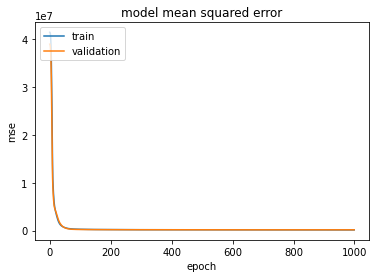

In [16]:
print(history.history.keys())
#  "Accuracy"
plt.figure()
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
pred = model.predict(pdf_df)
# pred = pred * std_y + mean_y
# y = np.where(y > 0.5, 1, 0)
submit = {'country_id': index, 'next_week_hospitalizations':pred.astype(int).flatten()}
sdf = pd.DataFrame(data = submit)
sdf.to_csv('submit.csv',index = False)